In [1]:
import os
import joblib
import numpy as np
import pandas as pd

%precision 3
pd.options.display.precision = 3

In [2]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\live'

In [3]:
os.chdir(path = 'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\data')

In [4]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\data'

In [5]:
os.chdir(path = '..')

In [6]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main'

In [7]:
os.chdir(path = './data')

In [8]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\data'

In [9]:
os.chdir(path = 'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\data')

In [10]:
os.chdir(path = 'C:/Users/Administrator/Documents/PythonAdvanced-main/data')

In [11]:
os.chdir(path = r'C:\Users\Administrator\Documents\PythonAdvanced-main\data')

In [12]:
os.listdir()

['GDP_Per_Capital_2021.csv',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [13]:
df = pd.read_csv('https://bit.ly/Used_Cars_Price')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1275 non-null   int64 
 1   Age        1275 non-null   int64 
 2   KM         1275 non-null   int64 
 3   FuelType   1275 non-null   object
 4   HP         1275 non-null   int64 
 5   MetColor   1275 non-null   int64 
 6   Automatic  1275 non-null   int64 
 7   CC         1275 non-null   int64 
 8   Doors      1275 non-null   int64 
 9   Weight     1275 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 99.7+ KB


In [15]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [16]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [17]:
cols = ['MetColor', 'Automatic']

In [18]:
df[cols] = df[cols].astype(str)

In [19]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

In [20]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000
mean,9690.233,60.603,73692.409,100.397,1559.513,3.998,1062.692
std,2029.844,13.694,35949.783,13.111,184.690,0.951,39.790
min,4350.000,19.000,1.000,69.000,1300.000,2.000,1000.000
25%,8250.000,51.000,48948.500,86.000,1400.000,3.000,1035.000
50%,9450.000,63.000,67451.000,110.000,1600.000,4.000,1060.000
75%,10950.000,71.500,90325.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1615.000


In [21]:
df.sort_values(by = ['KM']).head(n = 10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
433,7500,50,1,Diesel,90,1,0,2000,3,1260
1267,6950,76,1,Petrol,110,0,0,1600,5,1114
432,11250,47,5309,Petrol,110,1,1,1600,3,1070
18,14900,30,7000,Petrol,97,1,0,1400,5,1100
7,12950,29,9750,Petrol,97,1,0,1400,3,1100
210,13500,43,10000,Petrol,97,1,0,1400,5,1060
9,14950,23,10000,Petrol,97,1,0,1400,3,1100
431,12950,50,10210,Petrol,97,0,0,1400,5,1065
209,11500,39,12000,Petrol,110,1,0,1600,5,1075
430,10450,48,15000,Petrol,97,1,0,1400,3,1025


In [22]:
df = df[df['KM'].gt(1)]

In [23]:
df.iloc[430:436]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
430,10450,48,15000,Petrol,97,1,0,1400,3,1025
431,12950,50,10210,Petrol,97,0,0,1400,5,1065
432,11250,47,5309,Petrol,110,1,1,1600,3,1070
434,8950,52,31000,Petrol,97,0,0,1398,3,1025
435,6950,58,205000,Diesel,72,1,0,2000,4,1100
436,7900,68,204250,Diesel,72,0,0,2000,3,1115


In [24]:
df = df.reset_index(drop = True)

In [25]:
df.describe(include = object)

,FuelType,MetColor,Automatic
count,1273,1273,1273
unique,3,2,2
top,Petrol,1,0
freq,1128,842,1203


In [26]:
df['FuelType'].value_counts().sort_index()

CNG         17
Diesel     128
Petrol    1128
Name: FuelType, dtype: int64

In [27]:
df['FuelType'].value_counts(normalize = True).sort_index()

CNG       0.013
Diesel    0.101
Petrol    0.886
Name: FuelType, dtype: float64

In [28]:
from GraphicSetting import *

In [29]:
import HelloDataScience as hds

In [30]:
df['Price'].describe()[['min', 'max']]

min     4350.0
max    15950.0
Name: Price, dtype: float64

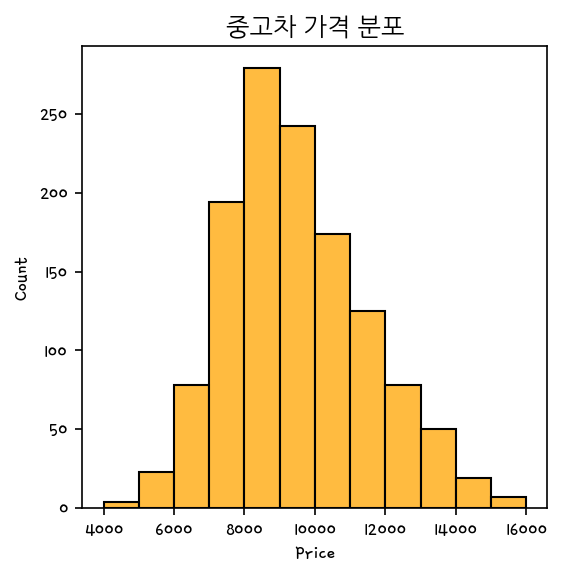

In [31]:
sns.histplot(data = df, x = 'Price', binwidth = 1000, binrange = (4000, 16000), 
             color = 'orange')
plt.title(label = '중고차 가격 분포', fontdict = {'family': 'NanumGothic'});

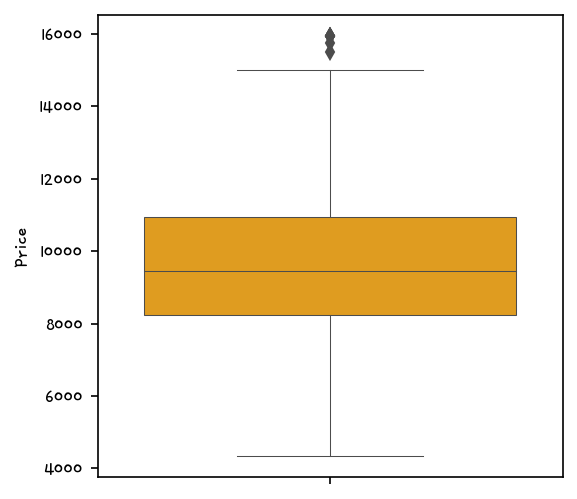

In [32]:
sns.boxplot(data = df, y = 'Price', color = 'orange');

In [33]:
df.columns[df.dtypes == 'int64']

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

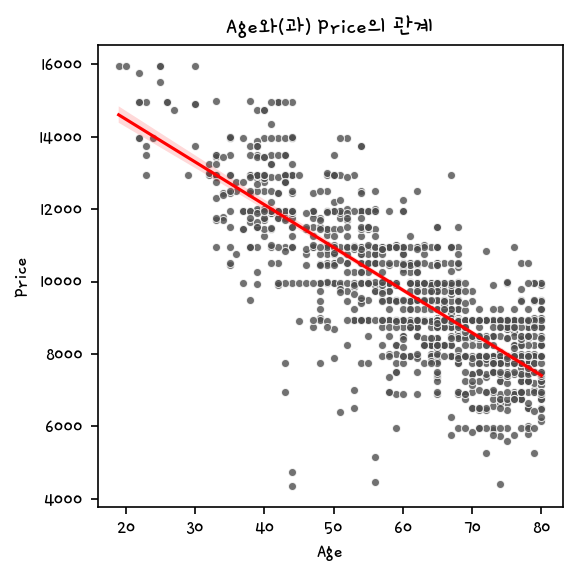

In [34]:
hds.plot_regression(data = df, x = 'Age', y = 'Price')

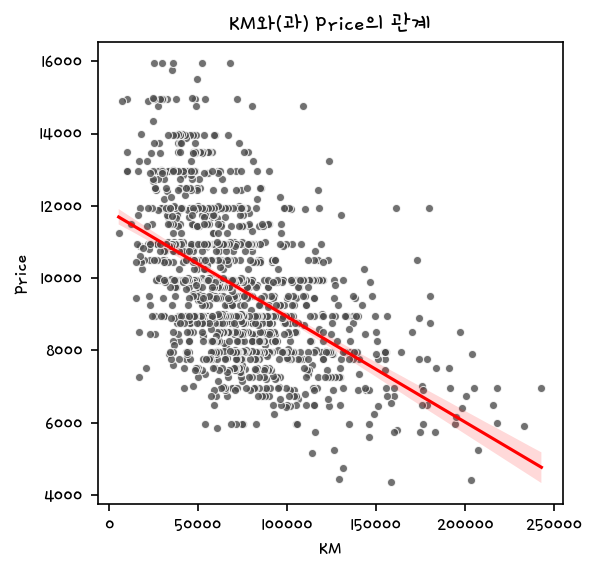

In [35]:
hds.plot_regression(data = df, x = 'KM', y = 'Price')

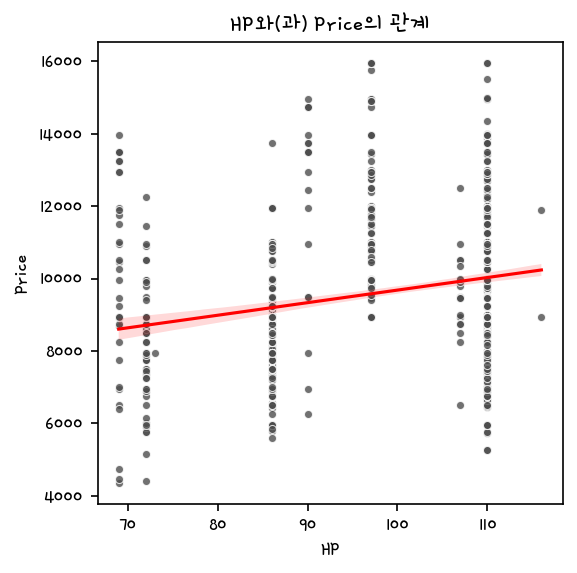

In [36]:
hds.plot_regression(data = df, x = 'HP', y = 'Price')

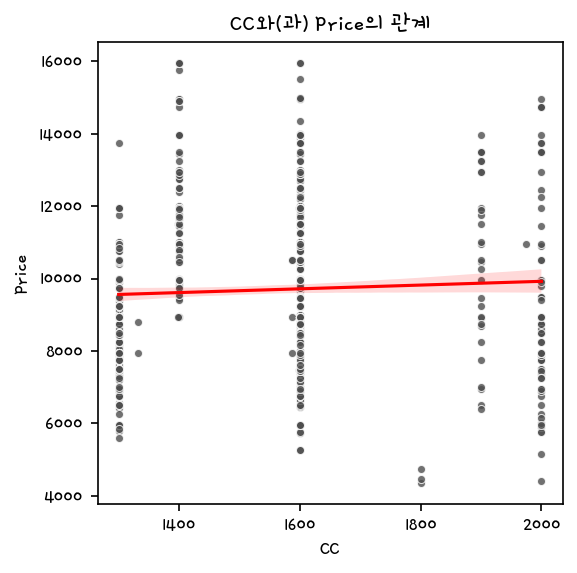

In [37]:
hds.plot_regression(data = df, x = 'CC', y = 'Price')

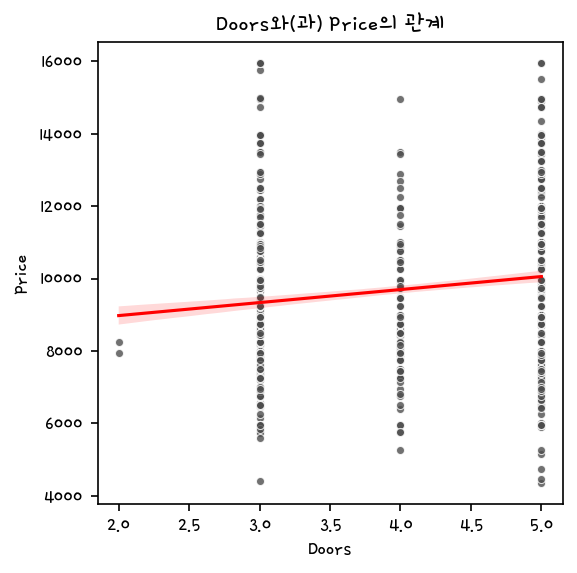

In [38]:
hds.plot_regression(data = df, x = 'Doors', y = 'Price')

In [39]:
df['Doors'].value_counts().sort_index()

2      2
3    571
4    128
5    572
Name: Doors, dtype: int64

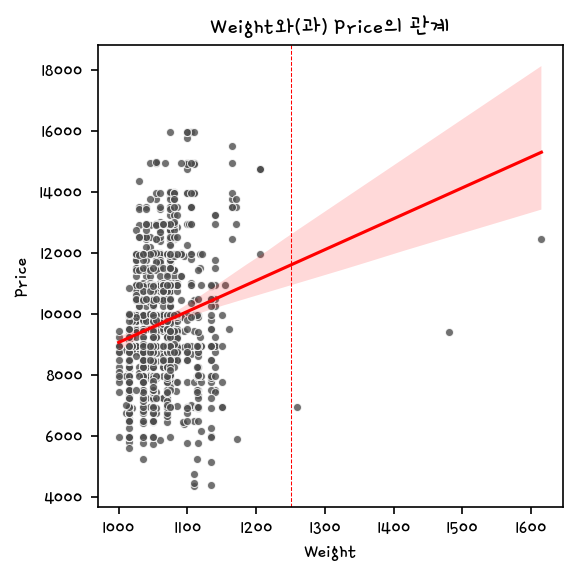

In [40]:
hds.plot_regression(data = df, x = 'Weight', y = 'Price')
plt.axvline(x = 1250, color = 'red', linewidth = 0.5, linestyle = '--');

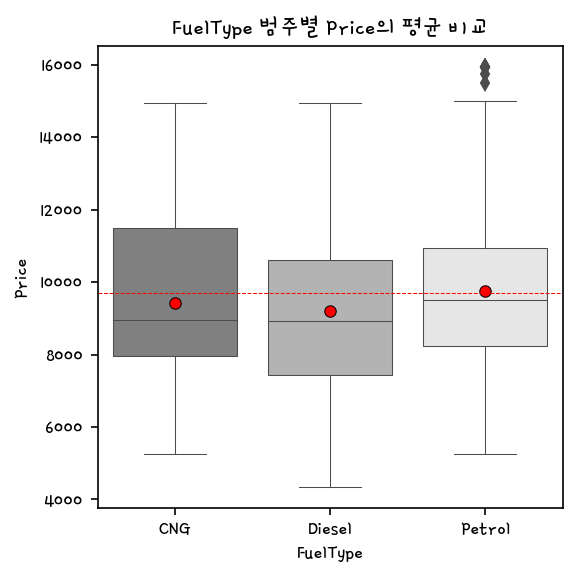

In [41]:
hds.plot_box_group(data = df, x = 'FuelType', y = 'Price', pal = ['0.5', '0.7', '0.9'])

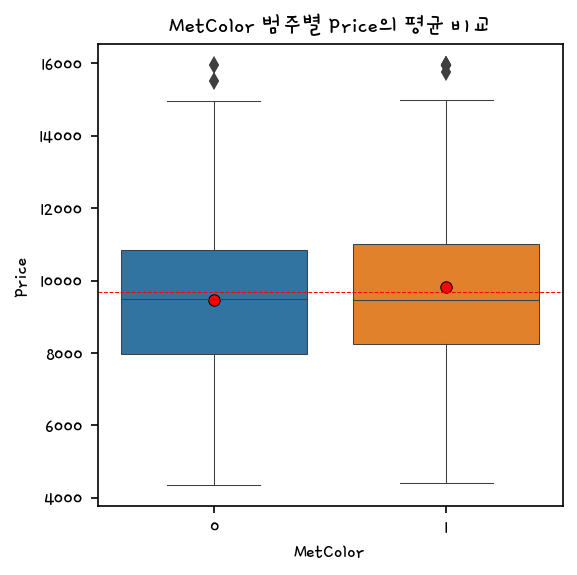

In [42]:
hds.plot_box_group(data = df, x = 'MetColor', y = 'Price')

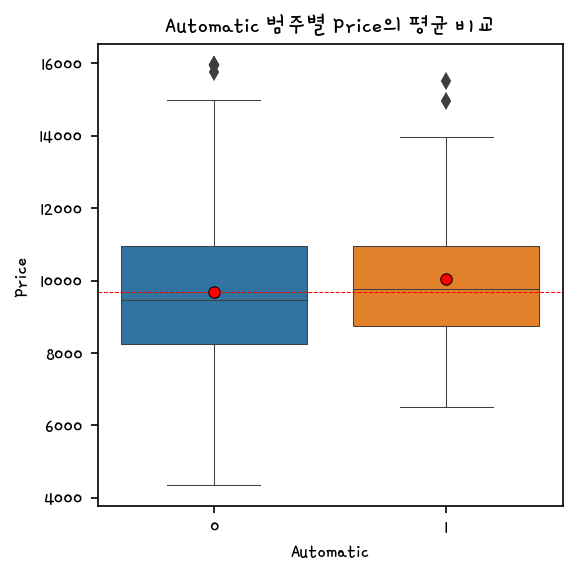

In [43]:
hds.plot_box_group(data = df, x = 'Automatic', y = 'Price')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1273 non-null   int64 
 1   Age        1273 non-null   int64 
 2   KM         1273 non-null   int64 
 3   FuelType   1273 non-null   object
 4   HP         1273 non-null   int64 
 5   MetColor   1273 non-null   object
 6   Automatic  1273 non-null   object
 7   CC         1273 non-null   int64 
 8   Doors      1273 non-null   int64 
 9   Weight     1273 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.6+ KB


In [45]:
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)]

In [46]:
df.shape[0]

1268

In [47]:
df = df.reset_index(drop = True)

In [48]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000
mean,9696.851,60.593,73737.629,100.442,1558.816,4.002,1061.572
std,2029.097,13.709,35858.332,13.100,183.657,0.949,33.839
min,4350.000,19.000,5309.000,69.000,1300.000,3.000,1000.000
25%,8250.000,51.000,48950.250,86.000,1400.000,3.000,1035.000
50%,9487.500,63.000,67358.500,110.000,1600.000,4.000,1060.000
75%,10950.000,72.000,90315.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1205.000


In [49]:
df.to_excel('Used_Cars_Price.xlsx', index = None)

In [50]:
df.to_csv('Used_Cars_Price.csv', index = None)

In [51]:
joblib.dump(value = df, filename = 'Used_Cars_Price.z')

['Used_Cars_Price.z']